In [1]:
FRAME_SIZE = 150
HOP_RATIO = 0.1
N_FFT = 1024

In [2]:
import importlib
import modules.AudioProcessor
importlib.reload(modules.AudioProcessor)
from modules.AudioProcessor import AudioProcessor

audio_files = [
    './dataset/trimmed_crowd_talking.mp3',
    './dataset/trimmed_motor_riding.mp3',
    './dataset/trimmed_water_flowing.mp3'
]
ap = AudioProcessor(
    audio_files, 
    frame_size_ms=FRAME_SIZE, 
    hop_length_ratio=HOP_RATIO
    )
print(ap.frames.shape)
print(ap.class_ids.shape)
print(ap.timestamps.shape)

torch.Size([2664, 7200])
(2664,)
(2664,)


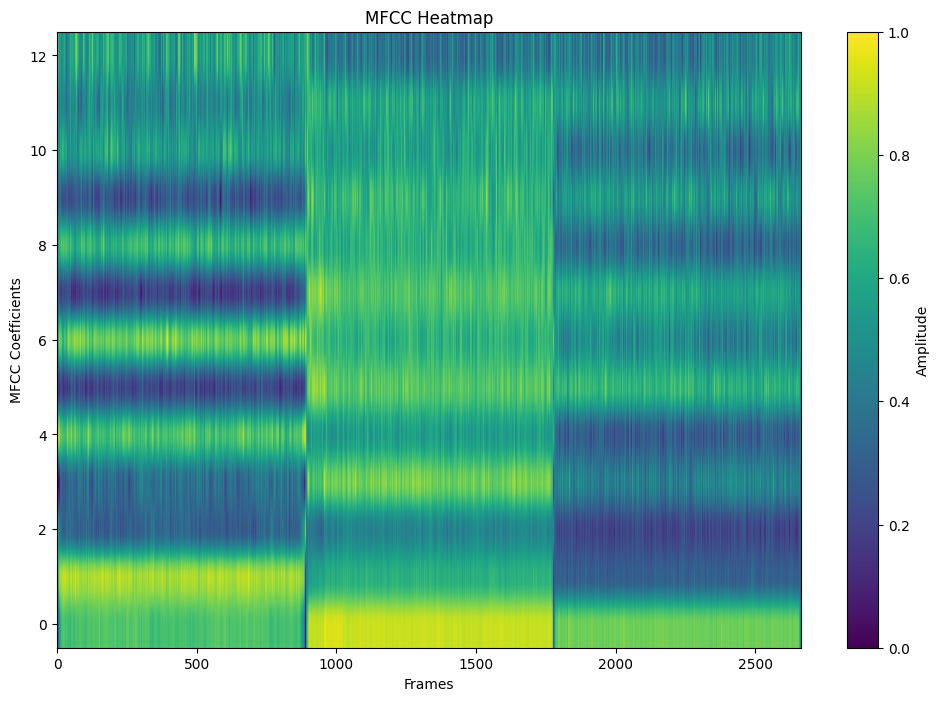

torch.Size([2664, 13])

In [3]:
import importlib
import modules.FeatureExtractor
importlib.reload(modules.FeatureExtractor)
from modules.FeatureExtractor import FeatureExtractor

fe = FeatureExtractor(n_fft=N_FFT)
fe.extract_mfcc(ap.frames)
fe.plot_mfccs()
fe.mfcc_features.shape

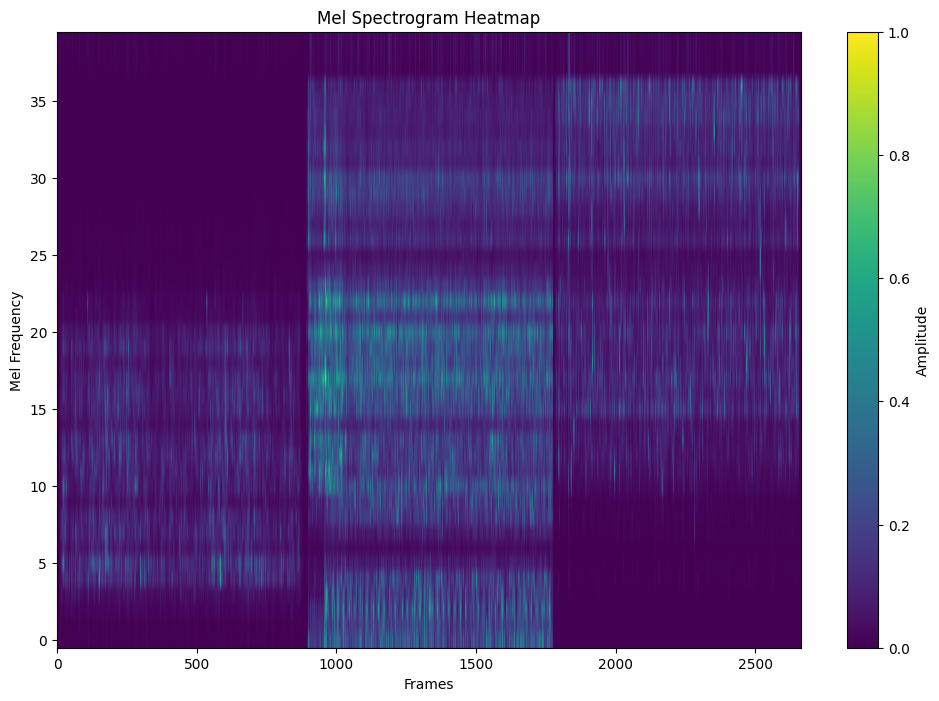

torch.Size([2664, 40])

In [4]:
fe.extract_melspectrogram(ap.frames)
fe.plot_melspectrogram()
fe.melspectrogram_features.shape

In [5]:
import warnings
import importlib
import modules.DatasetHandler
importlib.reload(modules.DatasetHandler)
from modules.DatasetHandler import DatasetHandler

warnings.filterwarnings("ignore")

dh = DatasetHandler(
    class_ids=ap.class_ids,
    timestamps=ap.timestamps, 
    mfccs=fe.mfcc_features, 
    mfsc=fe.melspectrogram_features,
    output_dir='output/no_pca' 
)
dh.generate_csv('all_features.csv')

In [6]:
important_mfccs = [i for i in range(13)]
important_mfsc = []
dh.save_selected_features(important_mfccs, important_mfsc, "mfccs_only.csv")
time_series_tensor = dh.generate_time_series('mfccs_only.csv', 'mfccs')

important_mfccs = []
important_mfsc = [i for i in range(40)]
dh.save_selected_features(important_mfccs, important_mfsc, "melspec_only.csv")
time_series_tensor = dh.generate_time_series('melspec_only.csv', 'melspec')

important_mfccs = [1, 3, 4, 5, 6, 7, 8, 9, 10, 11]
important_mfsc = [i for i in range(14)] + [i for i in range(16, 35)]
dh.save_selected_features(important_mfccs, important_mfsc, "combined.csv")
time_series_tensor = dh.generate_time_series('combined.csv', 'combined')


In [7]:
import modules.ART2Clusterer
importlib.reload(modules.ART2Clusterer)
from modules.ART2Clusterer import ART2ClustererSmoothing
import pandas as pd

def cluster_dataset(i, filename, n_features, plot_name, vigilance, pca=False):
    magenta = "\033[35m"
    green = "\033[32m"
    end = "\033[0m"
    optimal_tag = f"{green}(Optimal){end}" if not pca and filename == "combined" else ""
    print(f"{magenta}Clustering time series {i}{end} - {filename} features {optimal_tag}")

    df = pd.read_csv(f'output/{"" if pca else "no_"}pca/time_series_{i}/{filename}_{i}.csv')
    clusterer = ART2ClustererSmoothing(
        vigilance=vigilance,
        n_features=n_features,
        time_series_index=i,
        buffer_size=5,
        pca=pca
    )
    for index, row in df.iterrows():
        clusterer.fit_clusters(row)

    clusterer.write_to_csv()
    conf_matrix, acc = clusterer.calc_accuracy()
    print(f"{green}Accuracy:{end} {acc}")
    print(f"{green}Confusion Matrix:{end}\n{conf_matrix}")
    clusterer.plot_truth_vs_time(plot_name)

# Optimal Clustering Results for No PCA
Look at the graphs for the combined features

Clustering time series 0 - mfccs features 
Accuracy: 0.7231638418079096
Confusion Matrix:
[[333   4   0]
 [  0 307   5]
 [  2 234   0]]


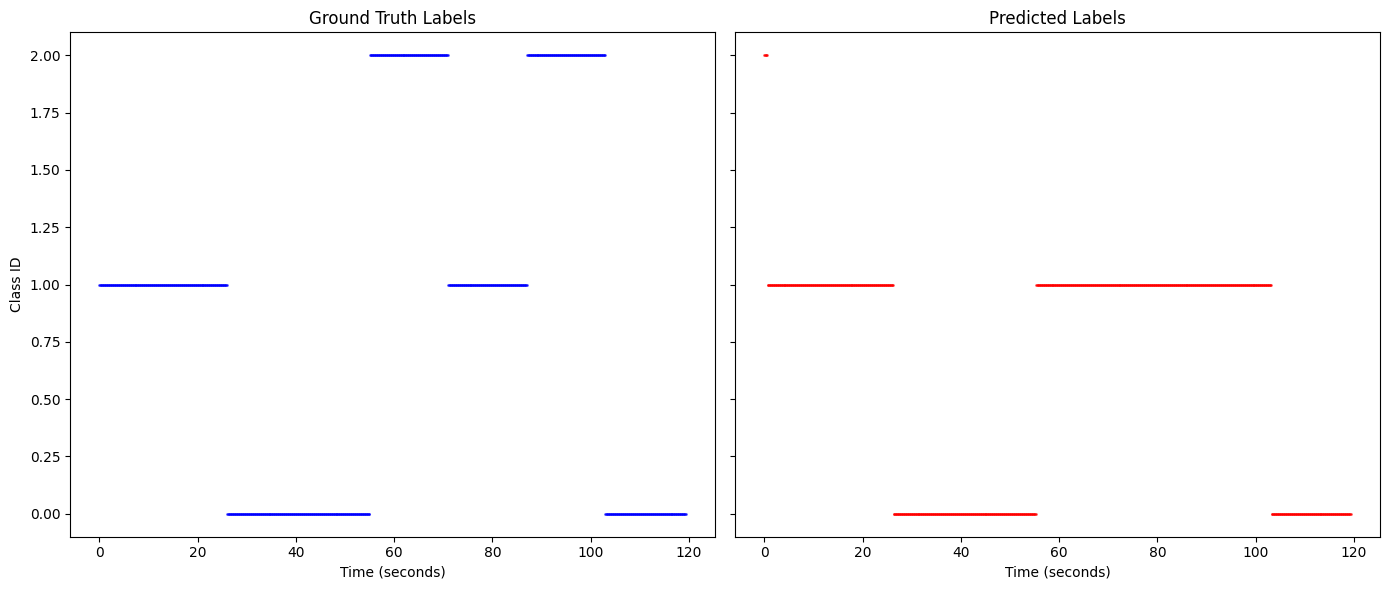

Clustering time series 0 - melspec features 
Accuracy: 0.5966101694915255
Confusion Matrix:
[[373   0   0]
 [ 11 155   5]
 [326   0   0]]


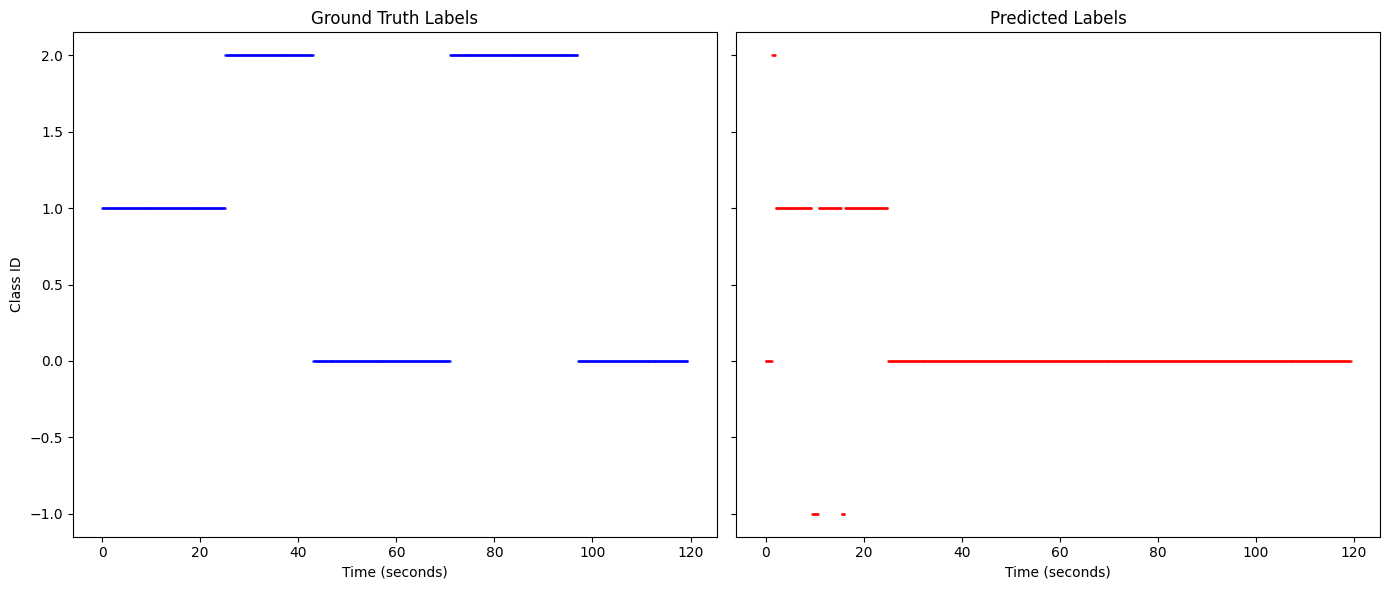

Clustering time series 0 - combined features (Optimal)
Accuracy: 0.9966101694915255
Confusion Matrix:
[[184   1   0]
 [  0 423   0]
 [  1   1 275]]


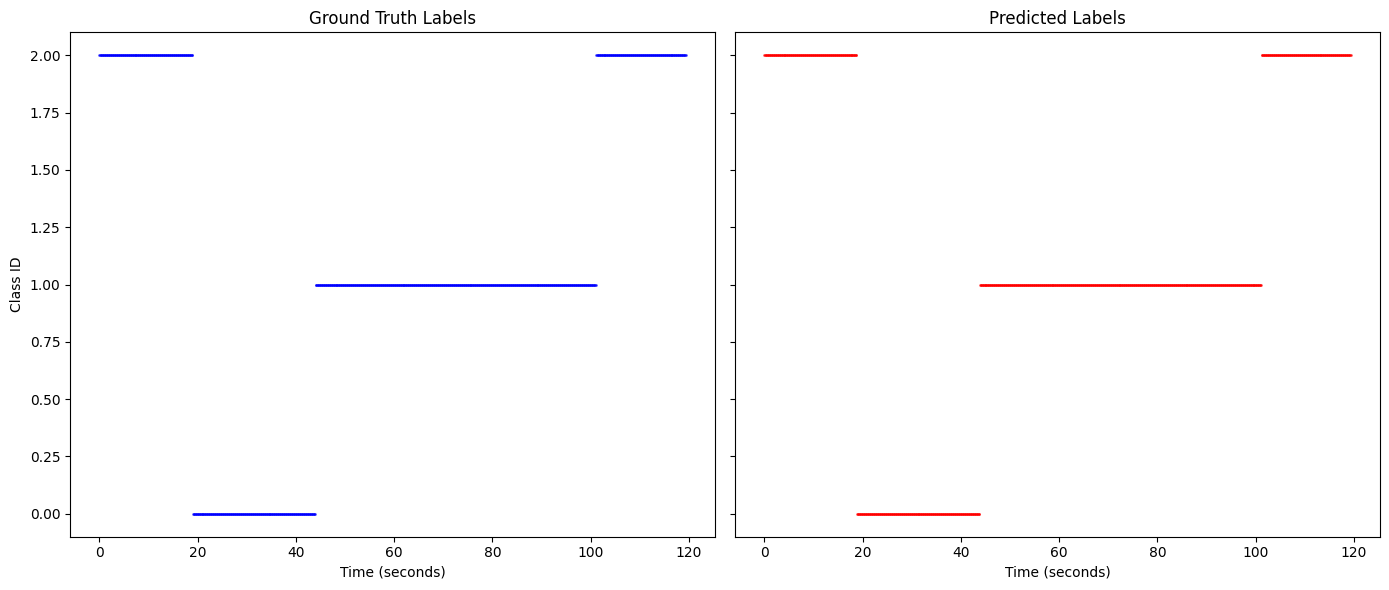

--------------------------------------------------------------------------------
Clustering time series 1 - mfccs features 
Accuracy: 0.9909604519774011
Confusion Matrix:
[[328   1   0]
 [  0 284   5]
 [  2   0 265]]


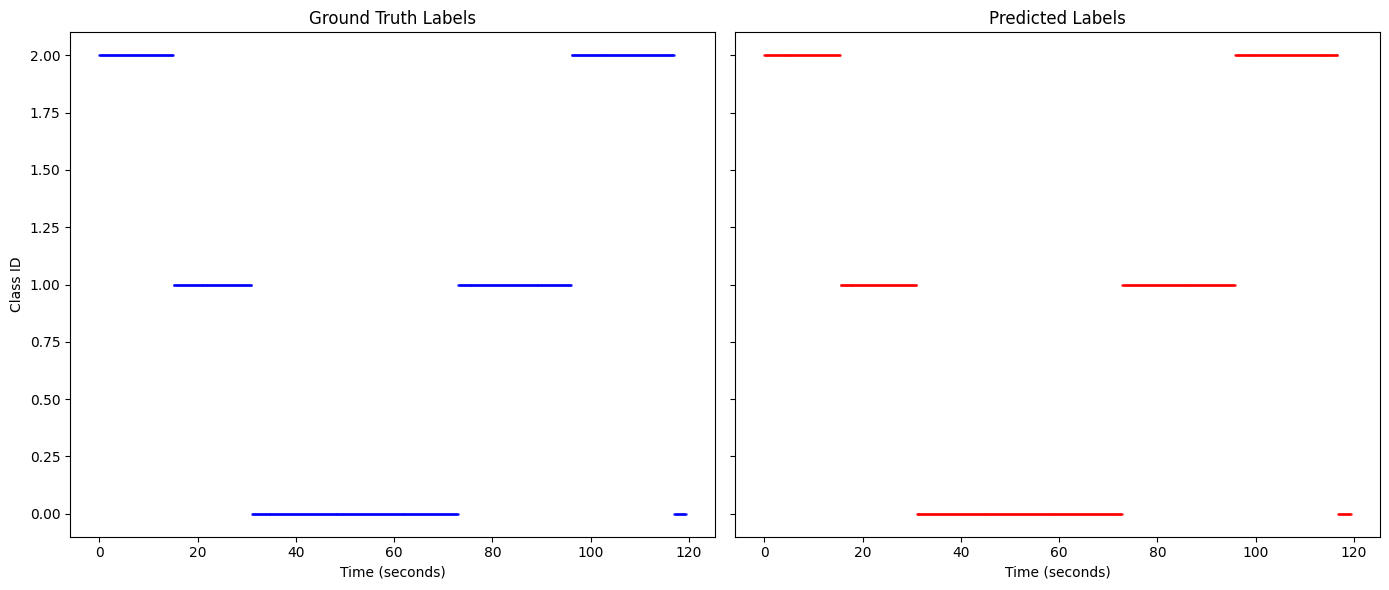

Clustering time series 1 - melspec features 
Accuracy: 0.7604519774011299
Confusion Matrix:
[[367   4   0]
 [ 10 306   5]
 [173   0   0]]


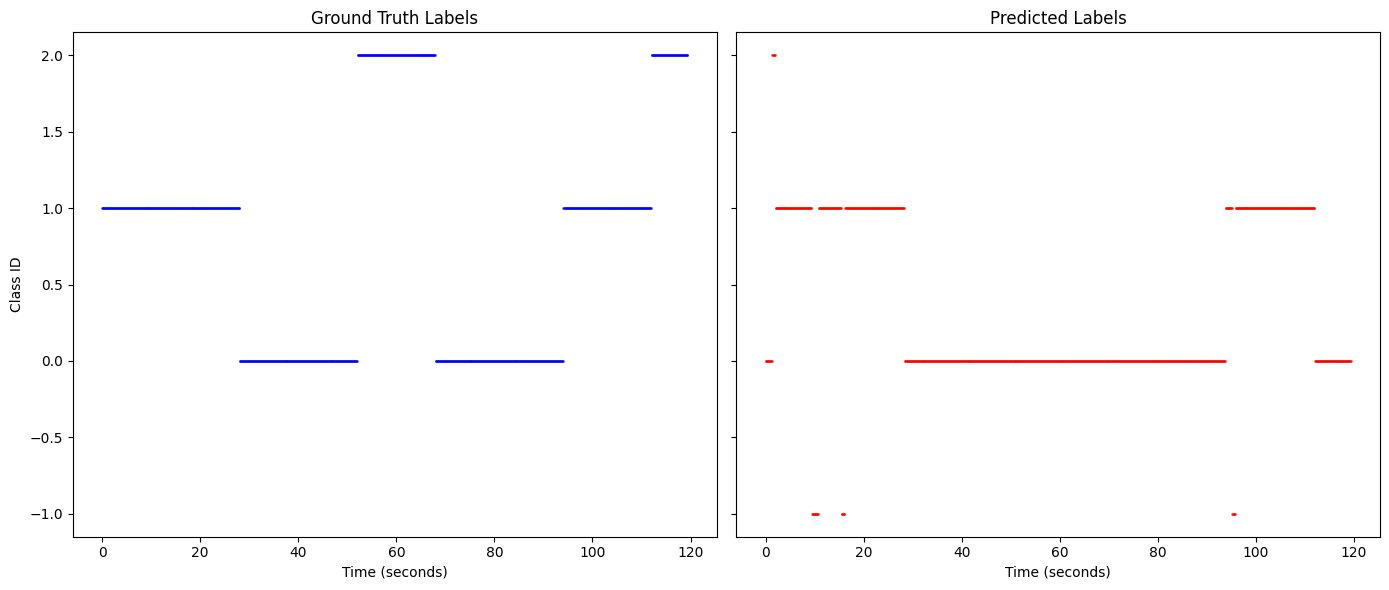

Clustering time series 1 - combined features (Optimal)
Accuracy: 0.9672316384180791
Confusion Matrix:
[[368   0   2]
 [  1 140   5]
 [  1   0 348]]


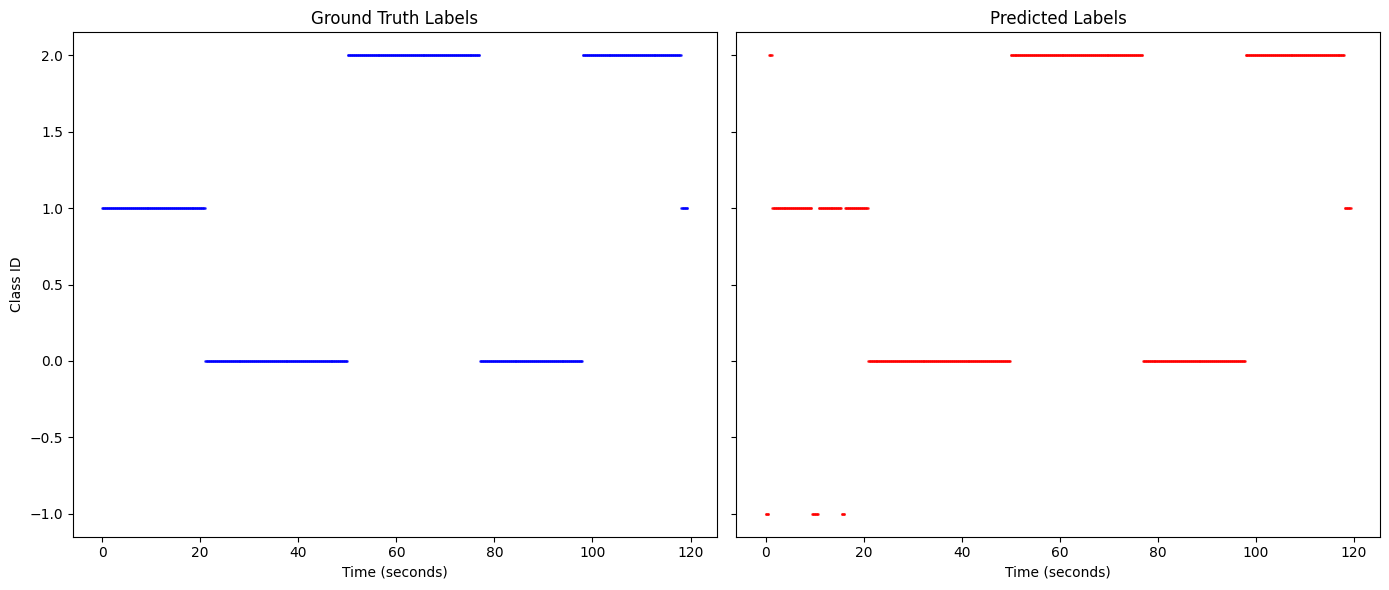

--------------------------------------------------------------------------------
Clustering time series 2 - mfccs features 
Accuracy: 0.9932203389830508
Confusion Matrix:
[[307   1   2]
 [  3 294   0]
 [  0   0 278]]


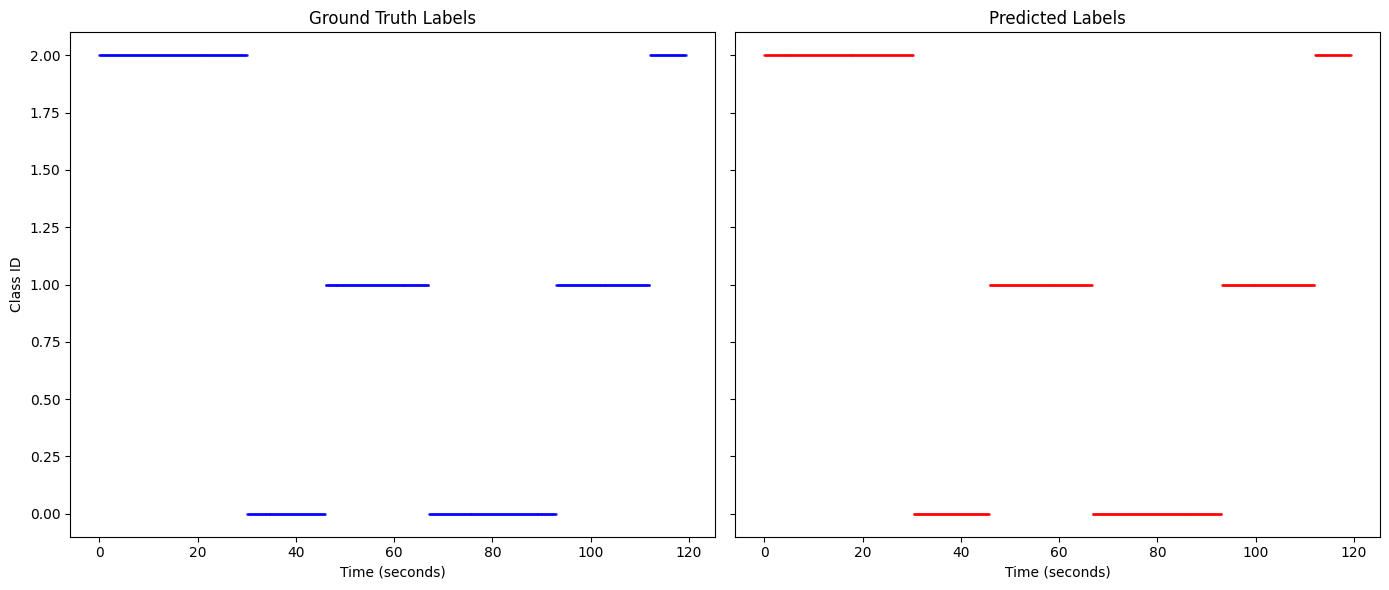

Clustering time series 2 - melspec features 
Accuracy: 0.6983050847457627
Confusion Matrix:
[[316   2   0]
 [  2 157   0]
 [262   1 145]]


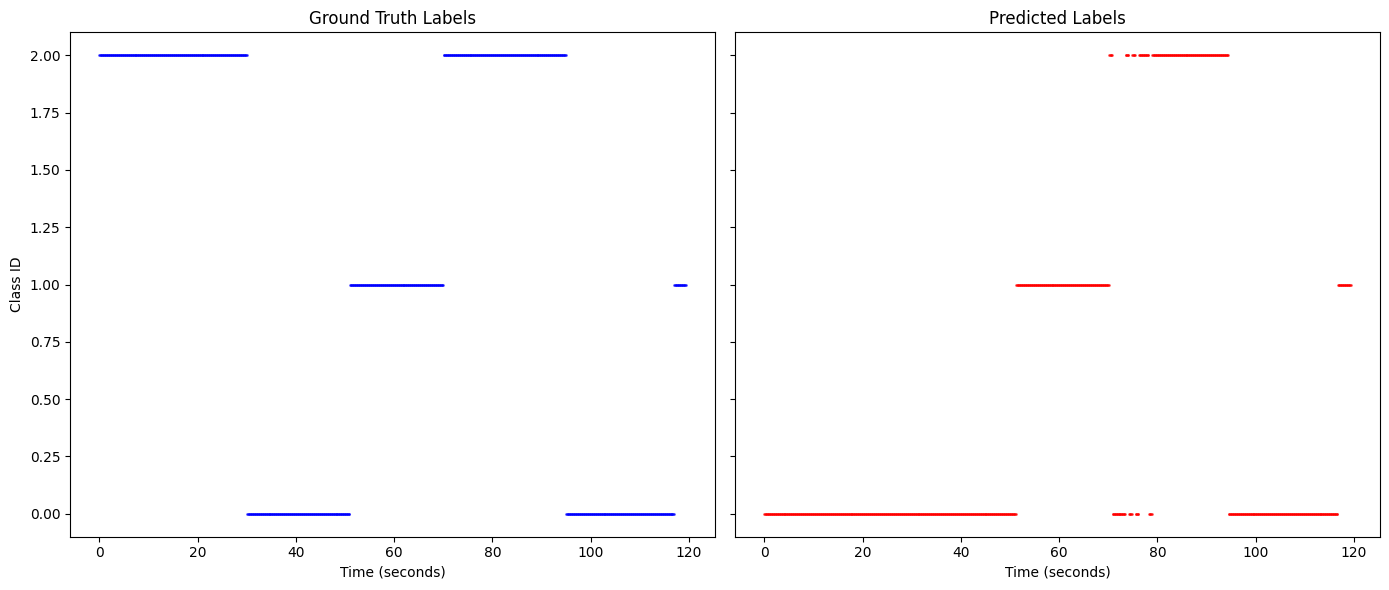

Clustering time series 2 - combined features (Optimal)
Accuracy: 0.9615819209039548
Confusion Matrix:
[[248   0   0]
 [  2 383   5]
 [  0   2 220]]


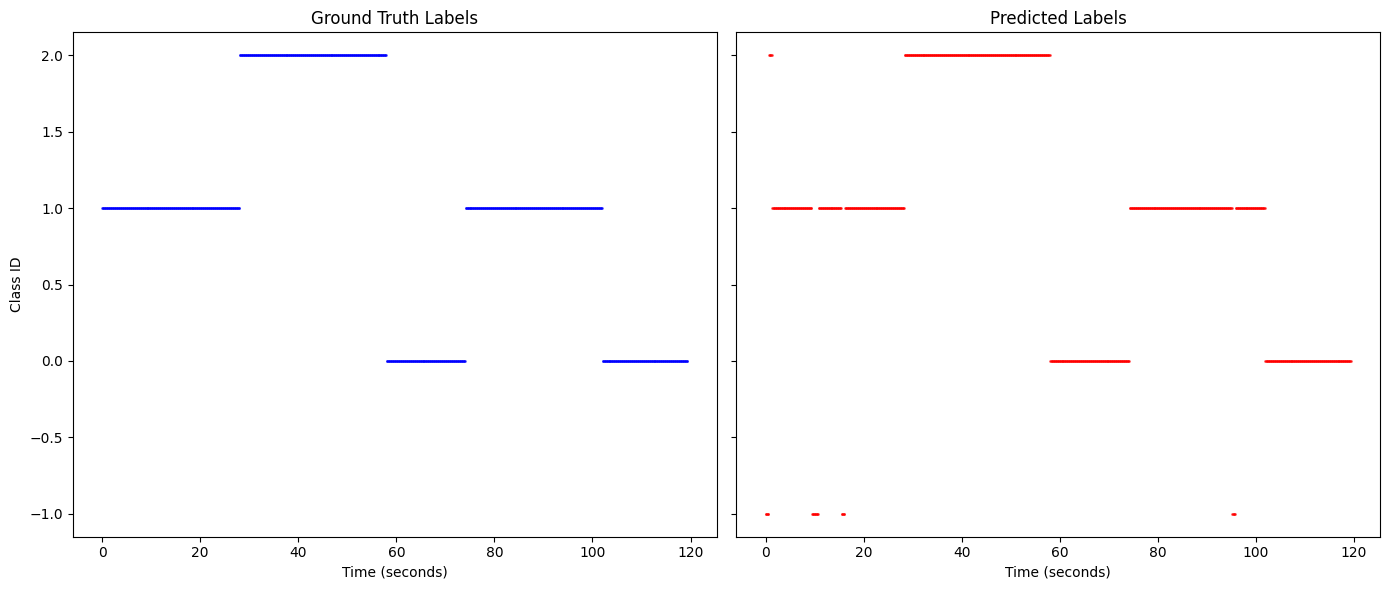

--------------------------------------------------------------------------------
Clustering time series 3 - mfccs features 
Accuracy: 0.7819209039548023
Confusion Matrix:
[[250   2   0]
 [  0 292   0]
 [  5 186 150]]


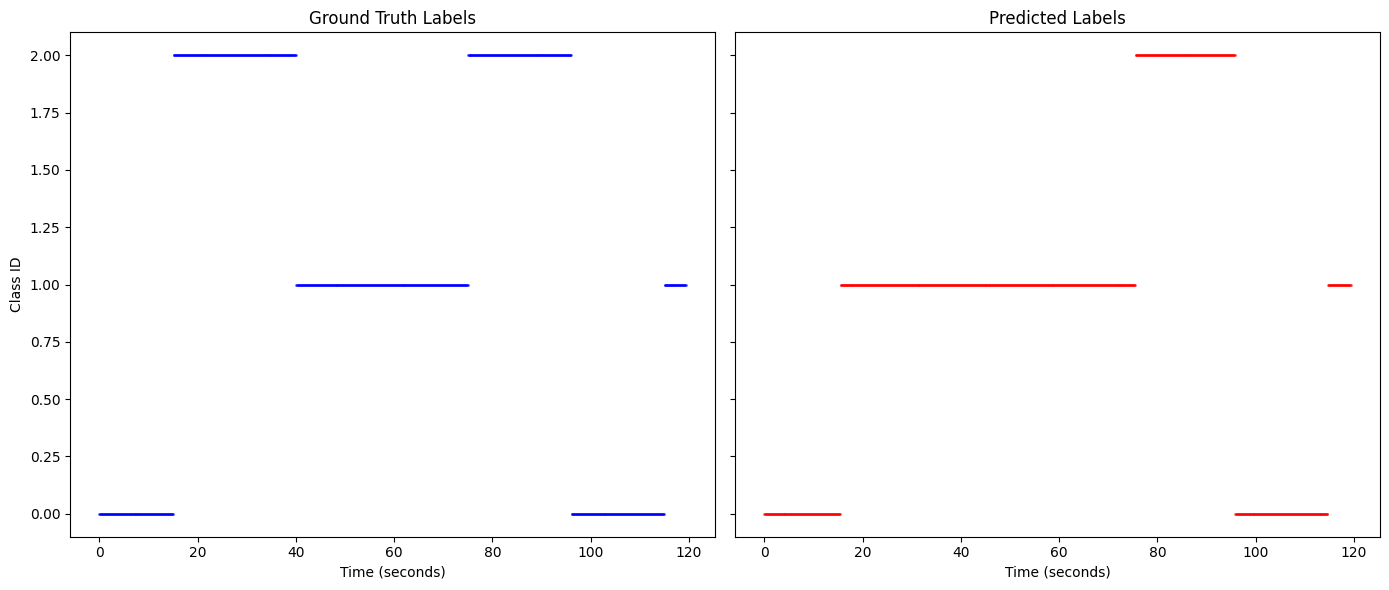

Clustering time series 3 - melspec features 
Accuracy: 0.6542372881355932
Confusion Matrix:
[[  0   0 303]
 [  0 260   3]
 [  0   0 319]]


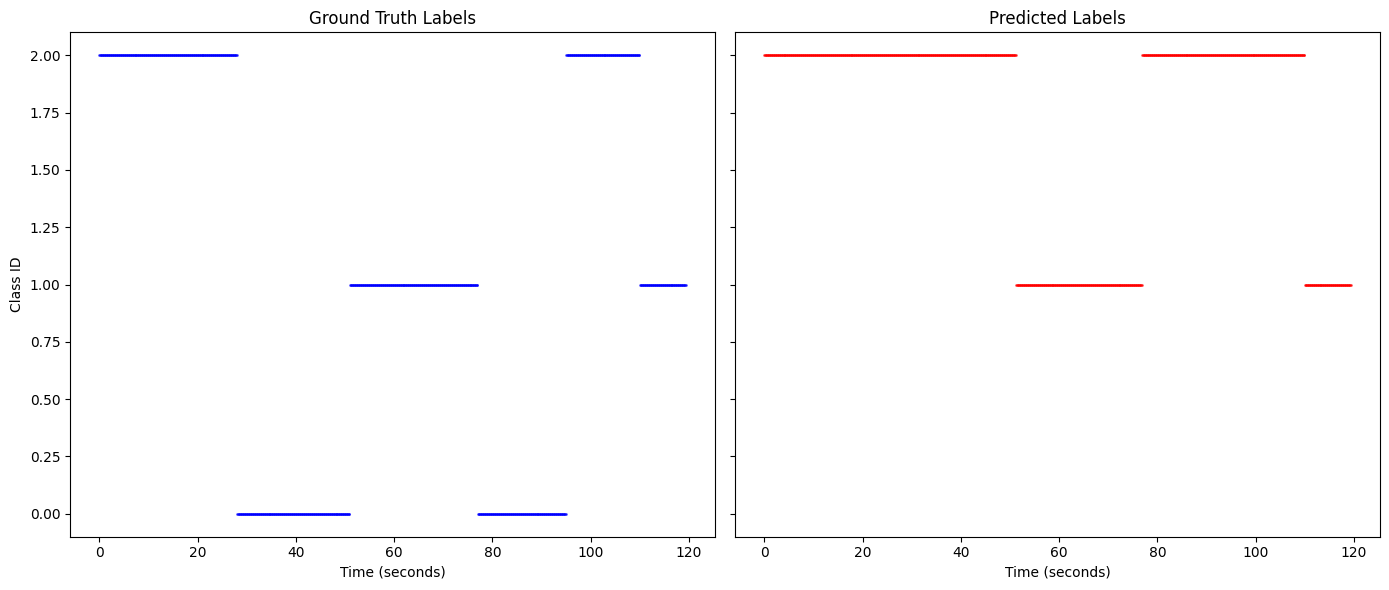

Clustering time series 3 - combined features (Optimal)
Accuracy: 0.9581920903954803
Confusion Matrix:
[[335   4   1]
 [  0 334   0]
 [  0   2 179]]


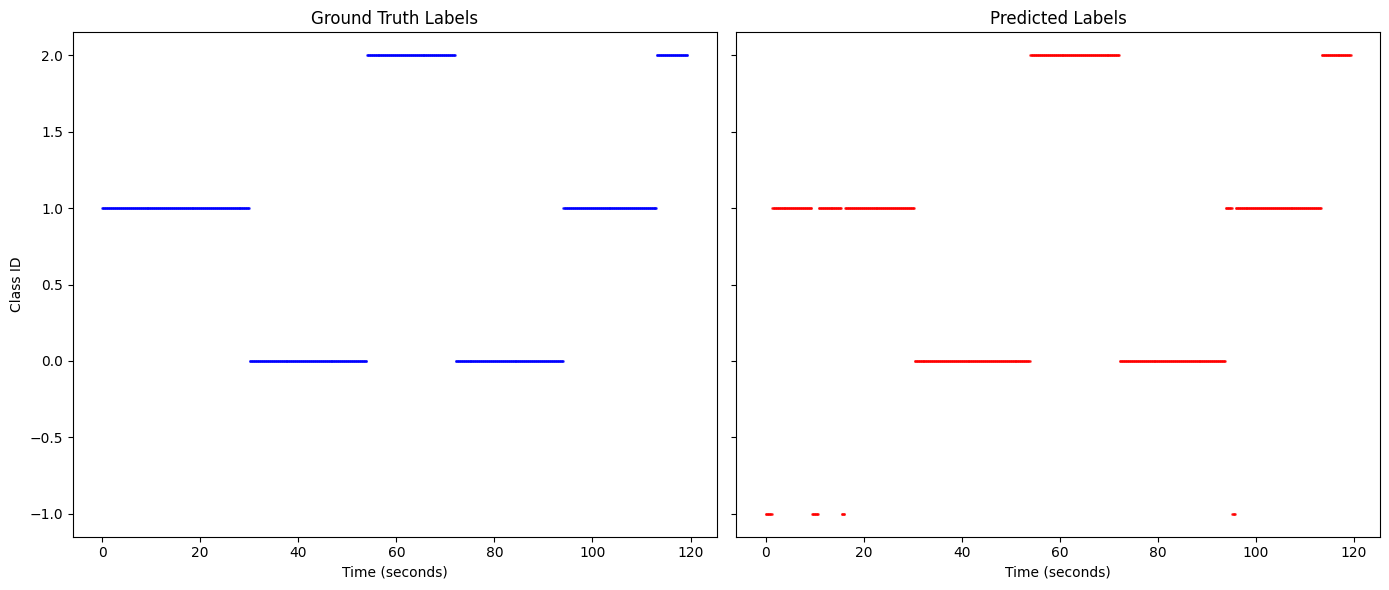

--------------------------------------------------------------------------------
Clustering time series 4 - mfccs features 
Accuracy: 0.9943502824858758
Confusion Matrix:
[[159   0   0]
 [  0 315   4]
 [  1   0 406]]


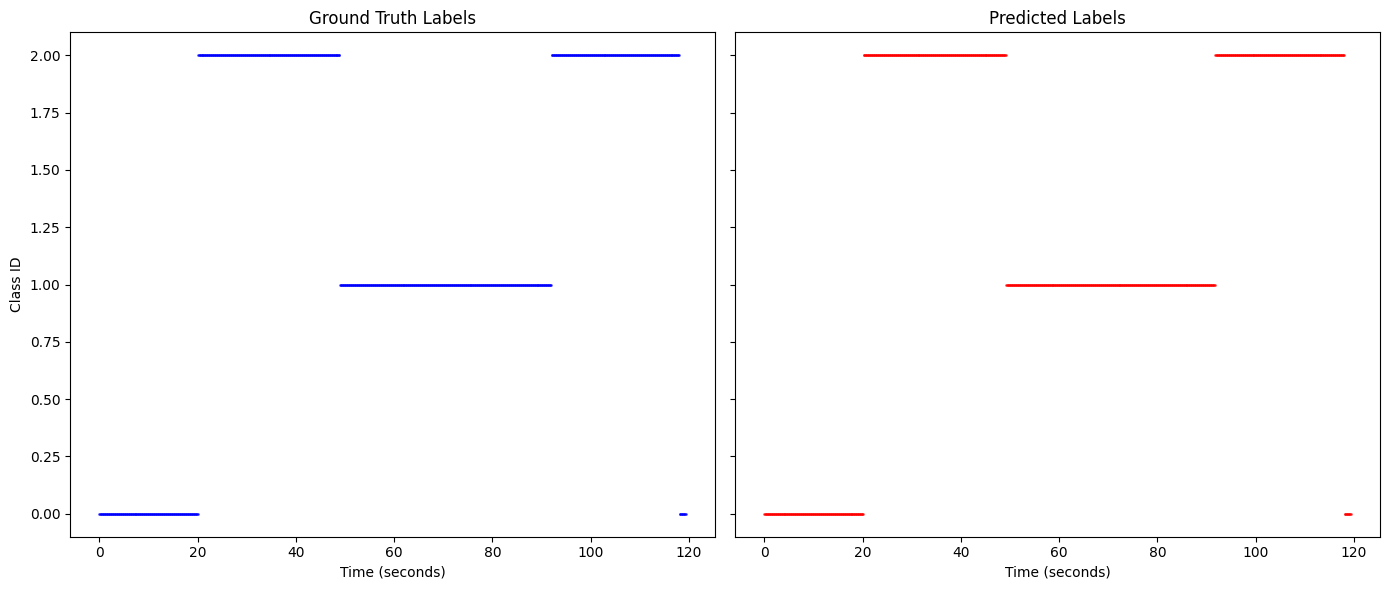

Clustering time series 4 - melspec features 
Accuracy: 0.7435028248587571
Confusion Matrix:
[[325   2   0]
 [  0 333   0]
 [225   0   0]]


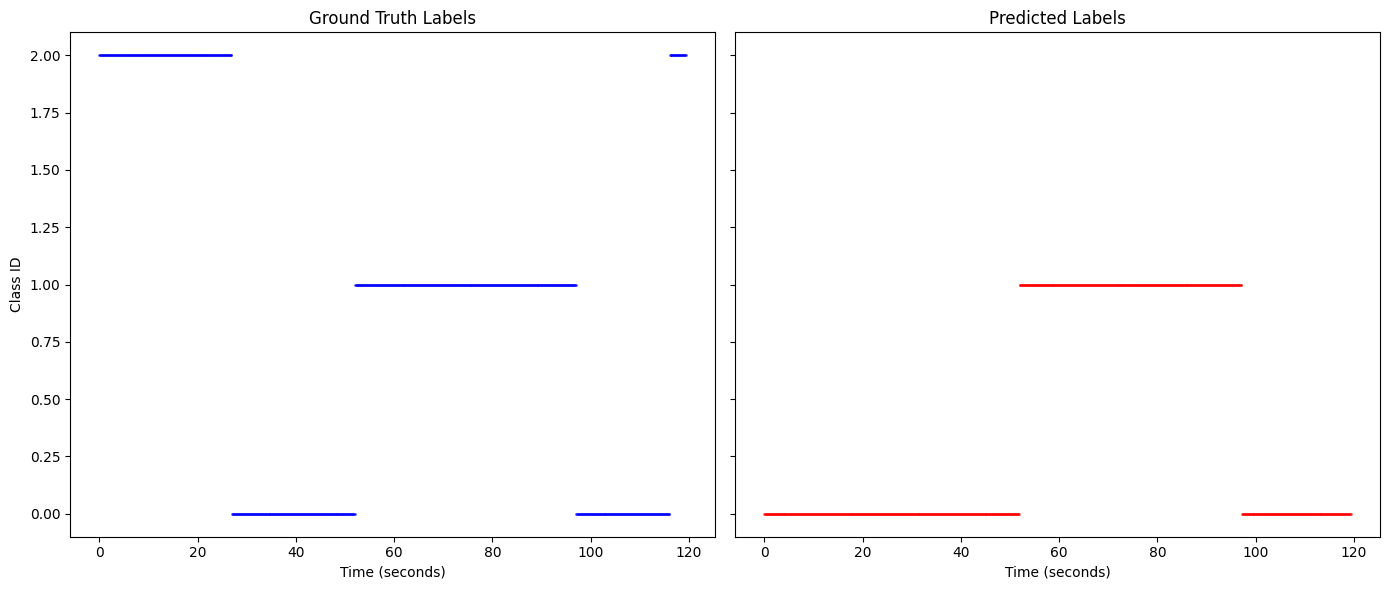

Clustering time series 4 - combined features (Optimal)
Accuracy: 0.9932203389830508
Confusion Matrix:
[[234   0   3]
 [  1 303   0]
 [  0   2 342]]


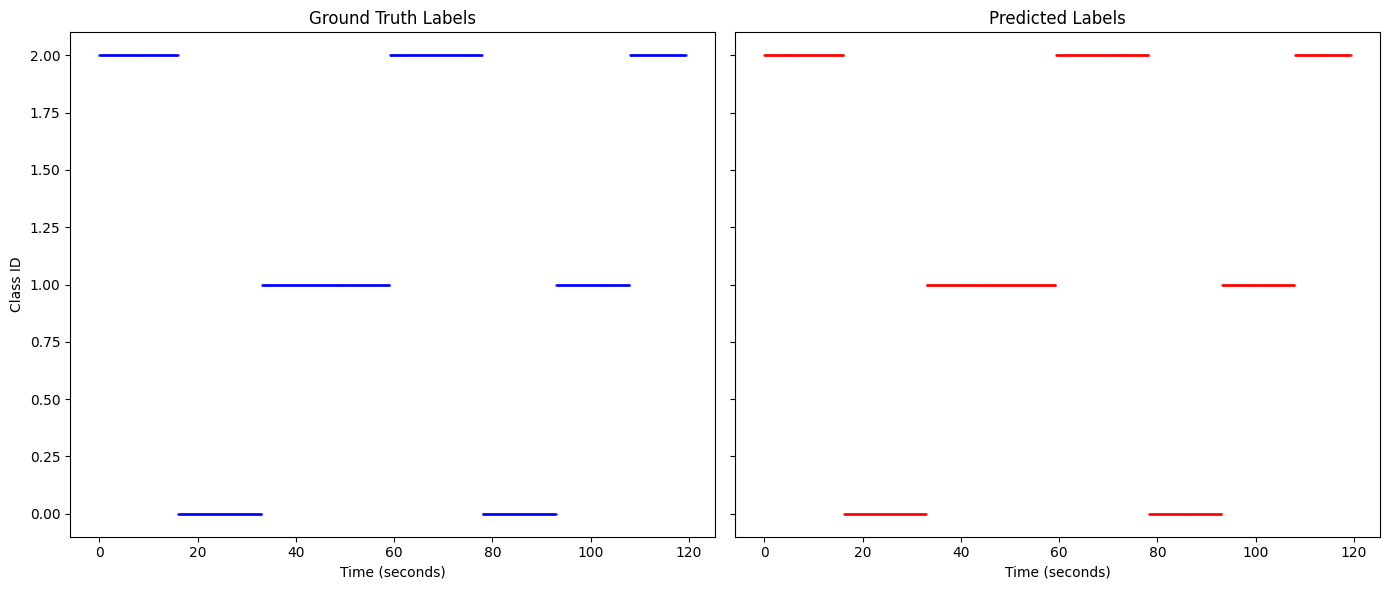

--------------------------------------------------------------------------------


In [8]:
MFCC_VIGILANCE = 0.5
MELSPEC_VIGILANCE = 0.5
COMBINED_VIGILANCE = 0.55

n_features = len(important_mfccs) + len(important_mfsc)
for i in range(5):
    cluster_dataset(i, 'mfccs', 13, 'MFCCs Only Ground Truth vs Predicted Labels', MFCC_VIGILANCE)
    cluster_dataset(i, 'melspec', 40, 'MFSCs Only Ground Truth vs Predicted Labels', MELSPEC_VIGILANCE)
    cluster_dataset(i, 'combined', n_features, 'Combined Ground Truth vs Predicted Labels', COMBINED_VIGILANCE)
    print('-'*80)

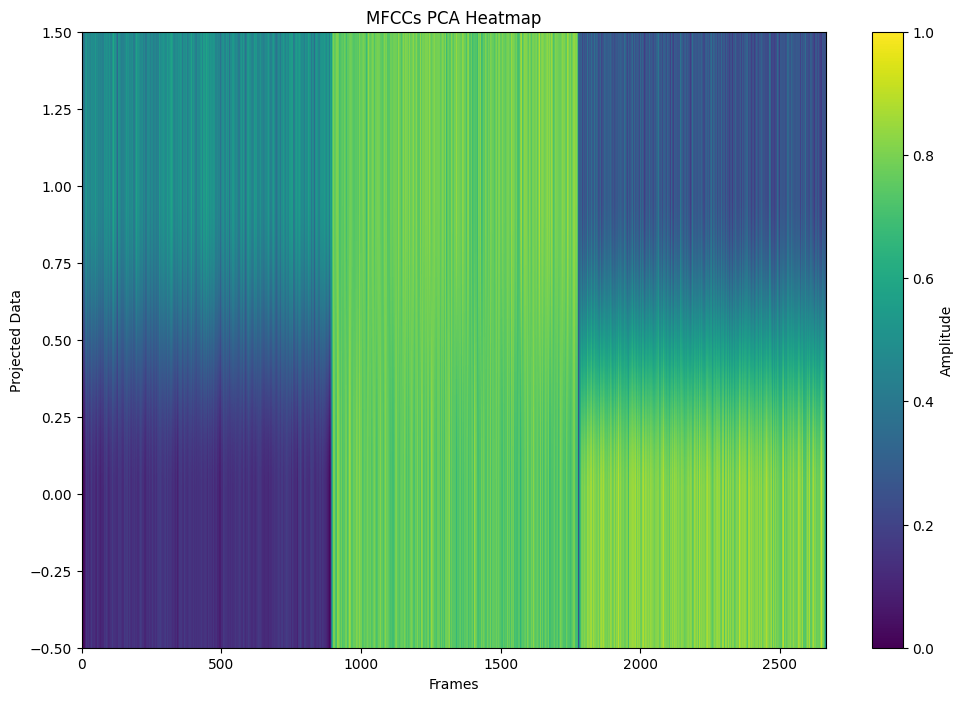

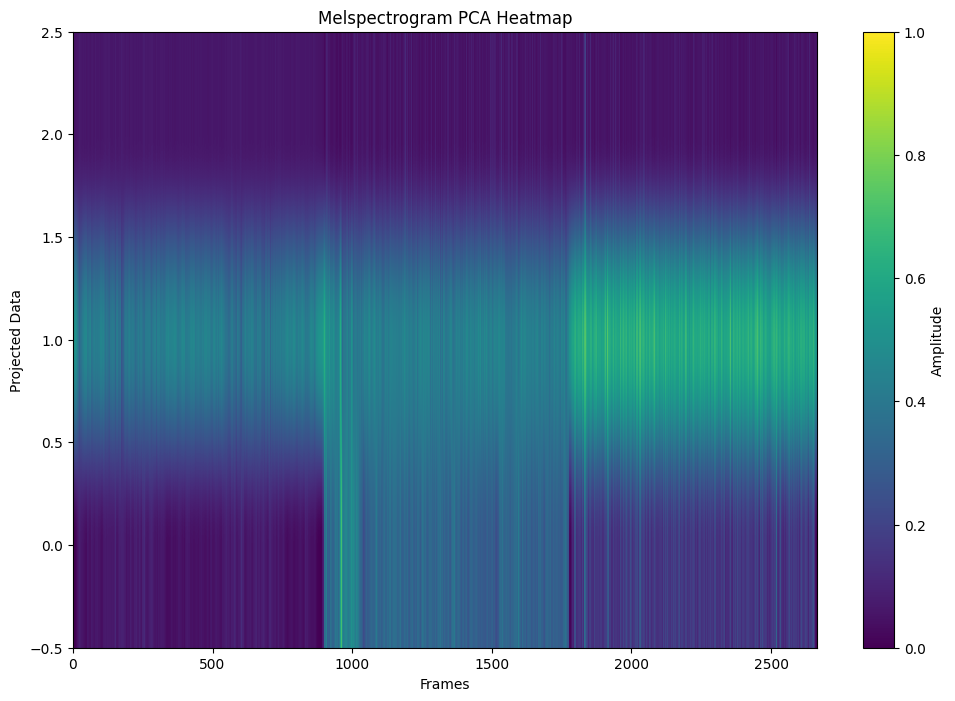

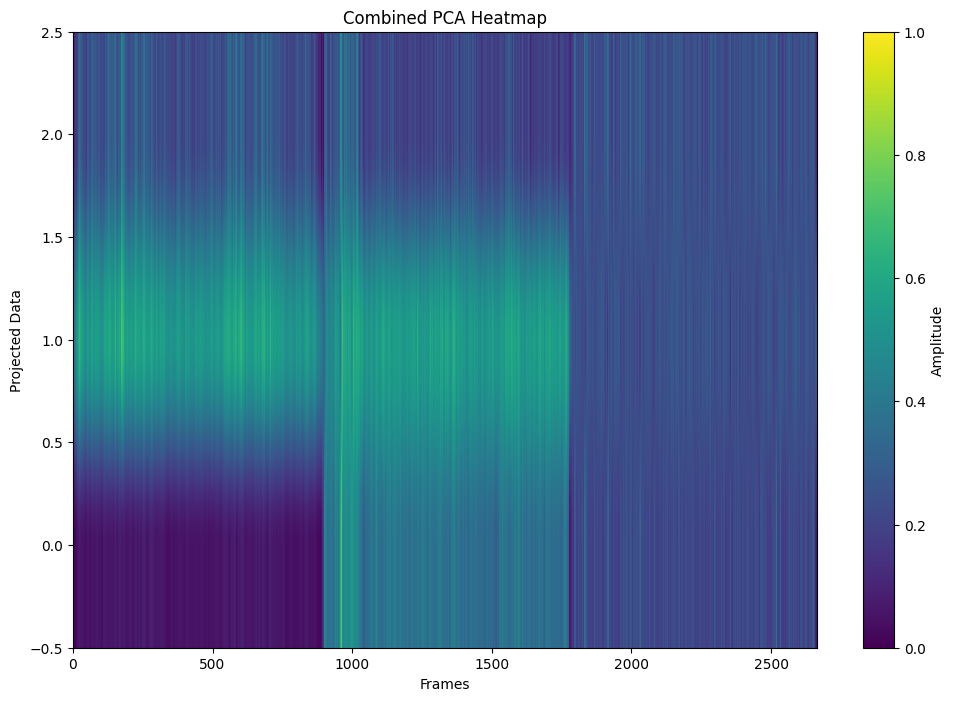

In [9]:
import modules.PCA
importlib.reload(modules.PCA)
from modules.PCA import PCA

mfccs_pca = PCA('output/no_pca/mfccs_only.csv', 0.6)
mfccs_pca.plot_projected_data("MFCCs PCA Heatmap")

mfsc_pca = PCA('output/no_pca/melspec_only.csv', 0.6)
mfsc_pca.plot_projected_data("Melspectrogram PCA Heatmap")

combined_pca = PCA('output/no_pca/combined.csv', 0.6)
combined_pca.plot_projected_data("Combined PCA Heatmap")
dh.set_output('output/pca')

dh.features = mfccs_pca.projected_data
dh.generate_csv("mfccs_only.csv", pca=True)
time_series_tensor = dh.generate_time_series('mfccs_only.csv', 'mfccs')

dh.features = mfsc_pca.projected_data
dh.generate_csv("melspec_only.csv", pca=True)
time_series_tensor = dh.generate_time_series('melspec_only.csv', 'melspec')

dh.features = combined_pca.projected_data
dh.generate_csv("combined.csv", pca=True)
time_series_tensor = dh.generate_time_series('combined.csv', 'combined')

Clustering time series 0 - mfccs features 
Accuracy: 0.9932203389830508
Confusion Matrix:
[[193   0   0]
 [  2 401   0]
 [  0   4 285]]


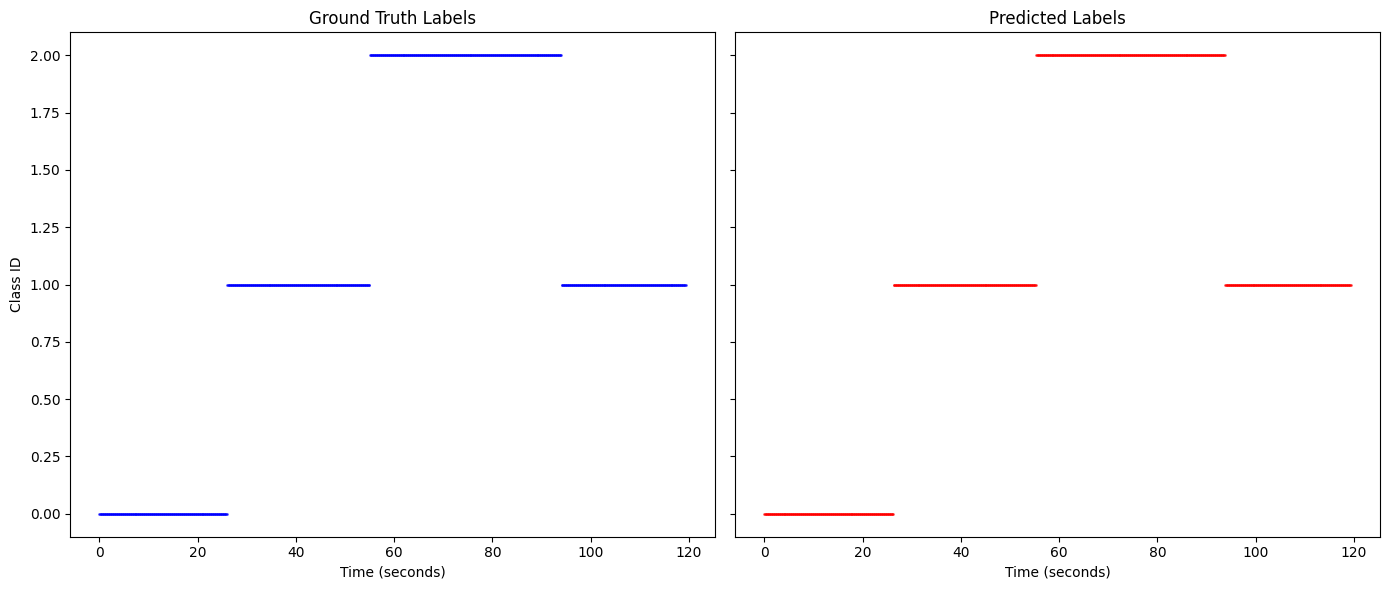

Clustering time series 0 - melspec features 
Accuracy: 0.9853107344632769
Confusion Matrix:
[[348   0   1]
 [  0 190   5]
 [  2   0 334]]


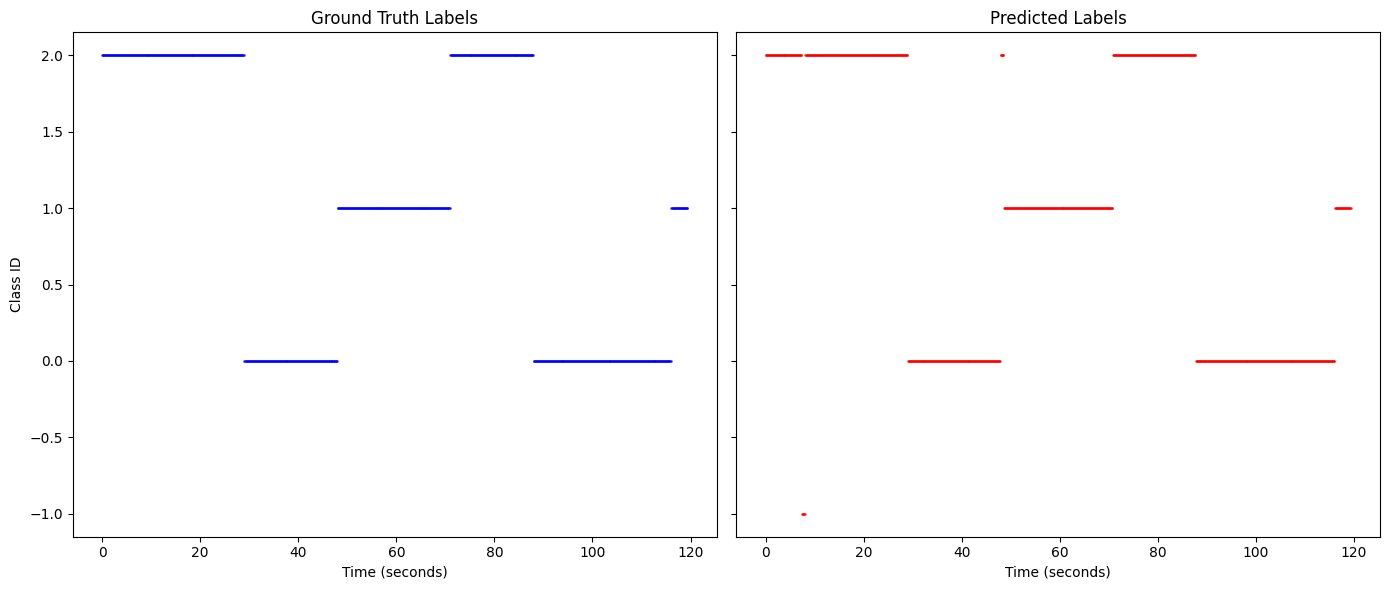

Clustering time series 0 - combined features 
Accuracy: 0.511864406779661
Confusion Matrix:
[[178   0 170]
 [  2   0 260]
 [  0   0 275]]


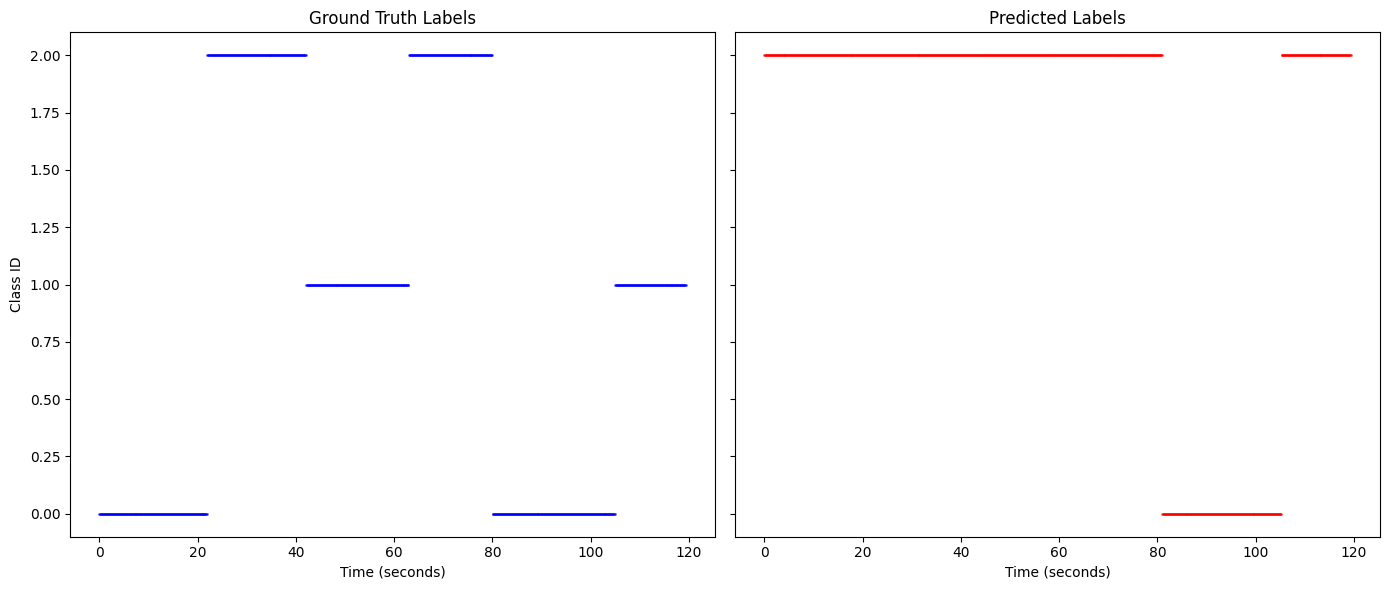

--------------------------------------------------------------------------------
Clustering time series 1 - mfccs features 
Accuracy: 0.9932203389830508
Confusion Matrix:
[[139   2   0]
 [  1 427   2]
 [  0   1 313]]


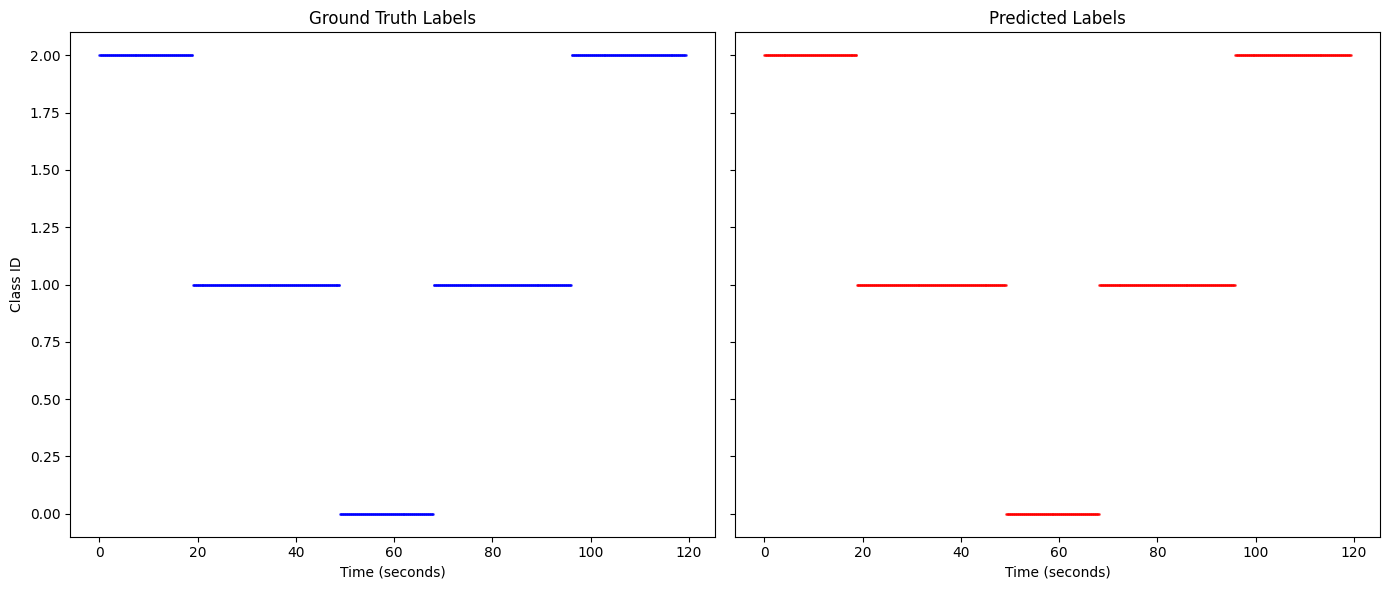

Clustering time series 1 - melspec features 
Accuracy: 0.7819209039548023
Confusion Matrix:
[[274   0   0]
 [ 11 215   2]
 [175   0 203]]


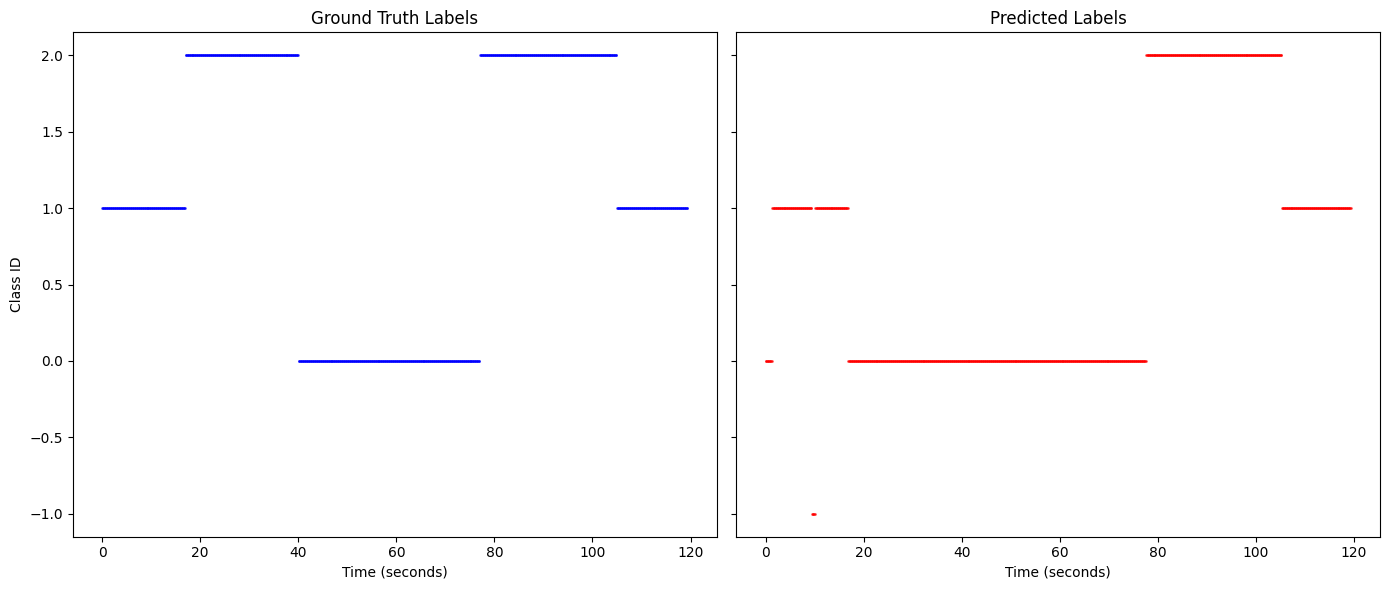

Clustering time series 1 - combined features 
Accuracy: 0.632768361581921
Confusion Matrix:
[[332   0   2]
 [311   5  10]
 [  2   0 223]]


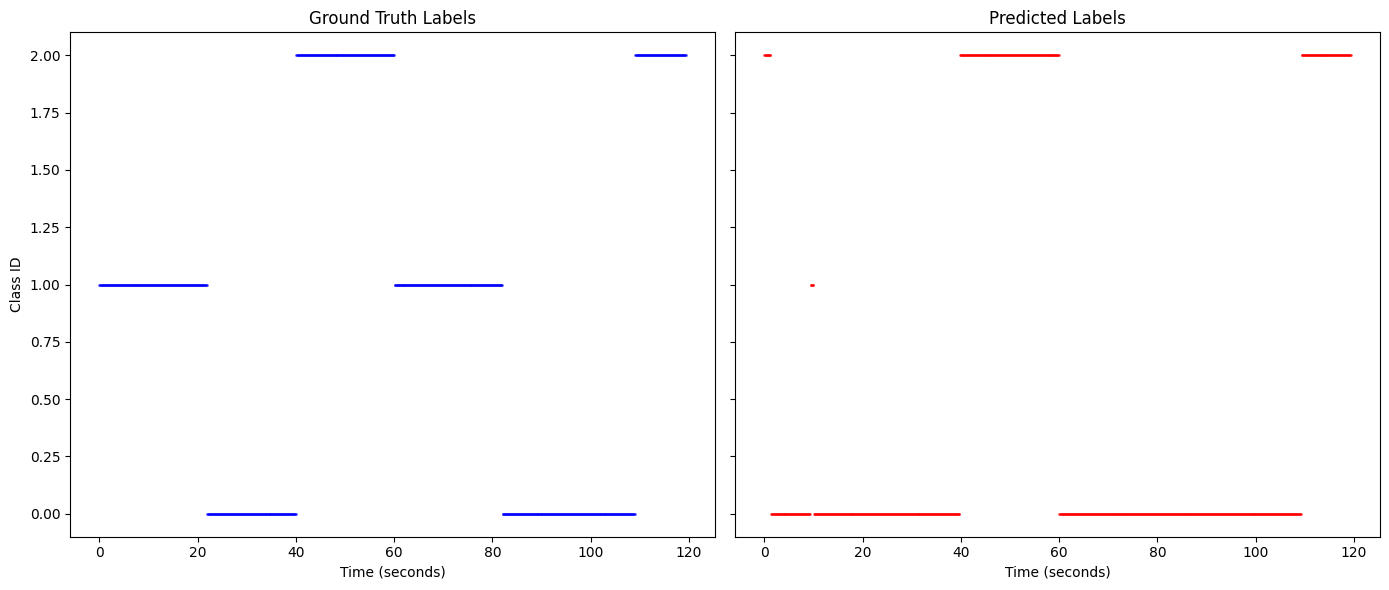

--------------------------------------------------------------------------------
Clustering time series 2 - mfccs features 
Accuracy: 0.9853107344632769
Confusion Matrix:
[[420   1   1]
 [  5 290   2]
 [  0   4 162]]


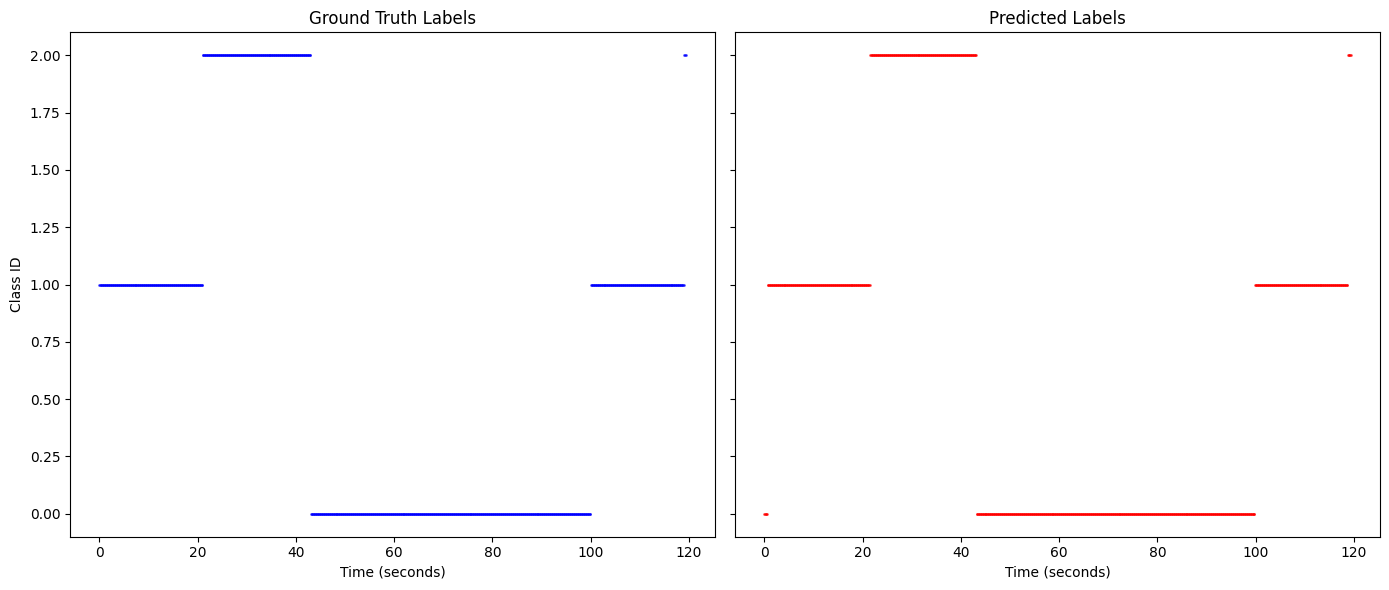

Clustering time series 2 - melspec features 
Accuracy: 0.9785310734463277
Confusion Matrix:
[[314   0   0]
 [  1 252  10]
 [  0   3 300]]


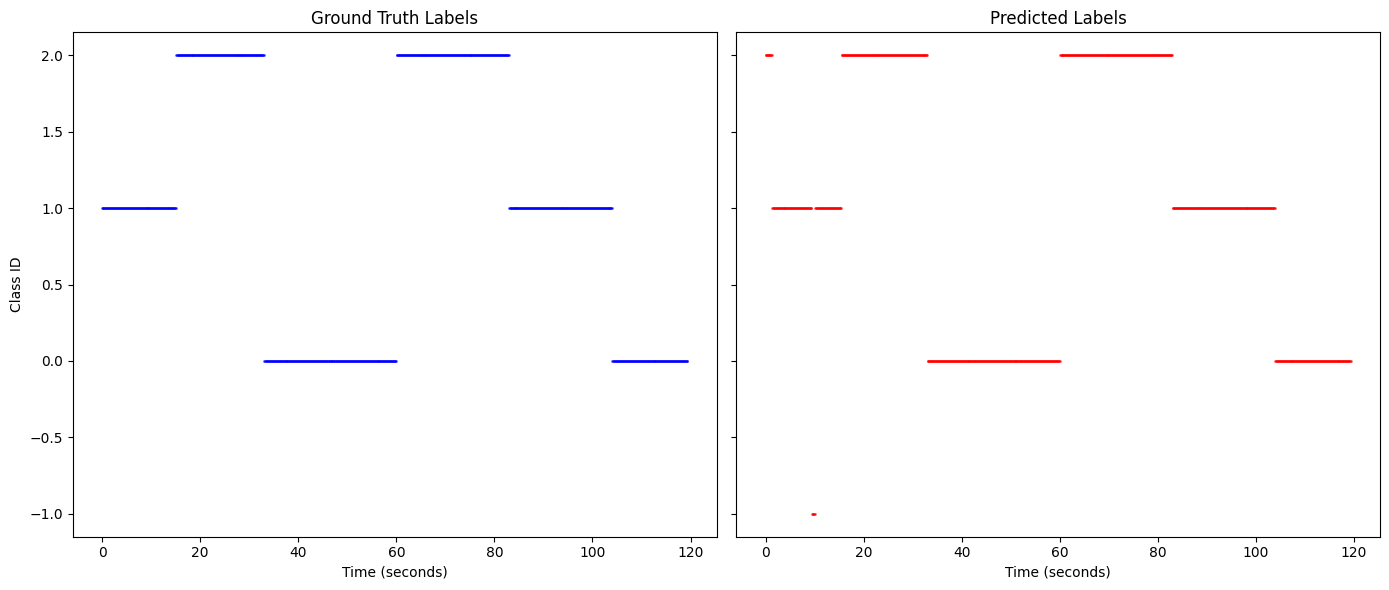

Clustering time series 2 - combined features 
Accuracy: 0.576271186440678
Confusion Matrix:
[[226  19   0]
 [  5 284   0]
 [194 157   0]]


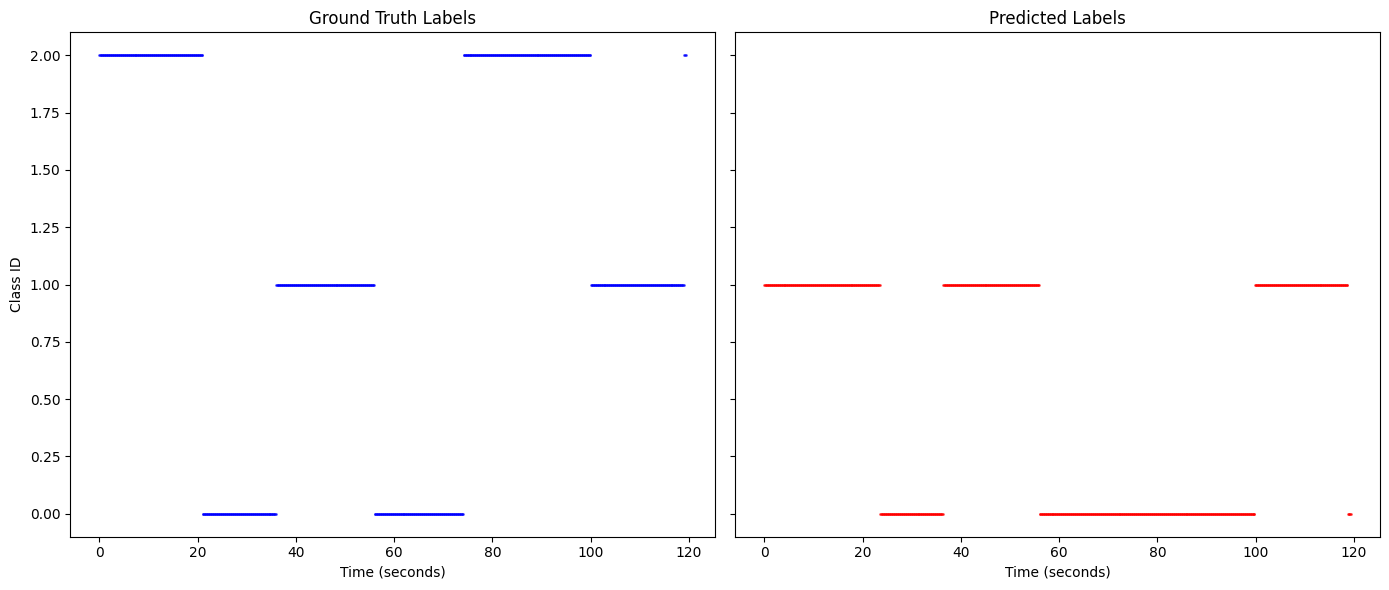

--------------------------------------------------------------------------------
Clustering time series 3 - mfccs features 
Accuracy: 0.9853107344632769
Confusion Matrix:
[[333   0   0]
 [  5 235   1]
 [  7   0 304]]


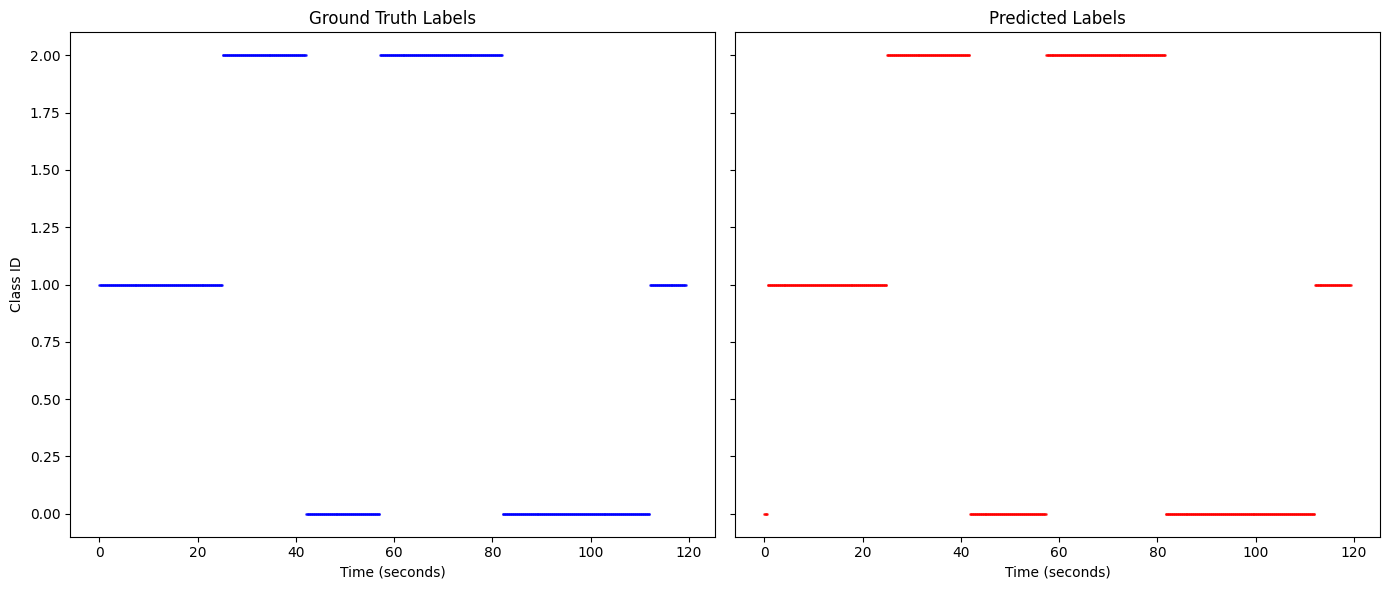

Clustering time series 3 - melspec features 
Accuracy: 0.9909604519774011
Confusion Matrix:
[[347   2   0]
 [  1 135   0]
 [  2   3 395]]


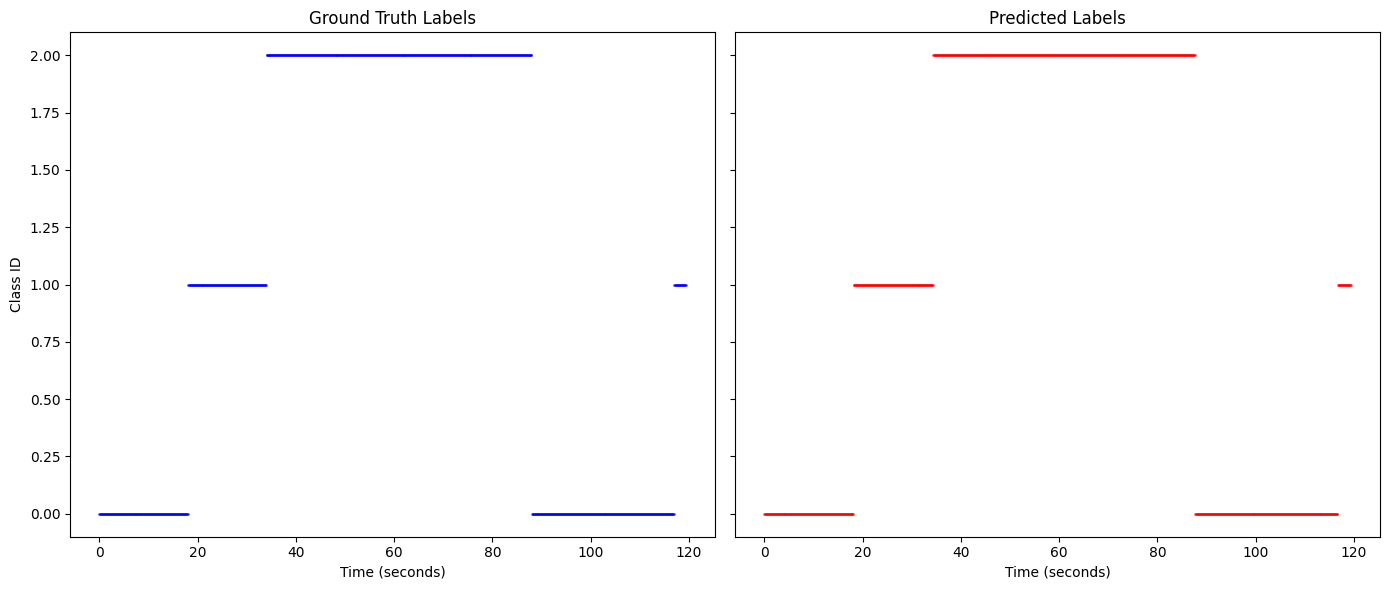

Clustering time series 3 - combined features 
Accuracy: 0.6711864406779661
Confusion Matrix:
[[366   0   0]
 [137   0 152]
 [  2   0 228]]


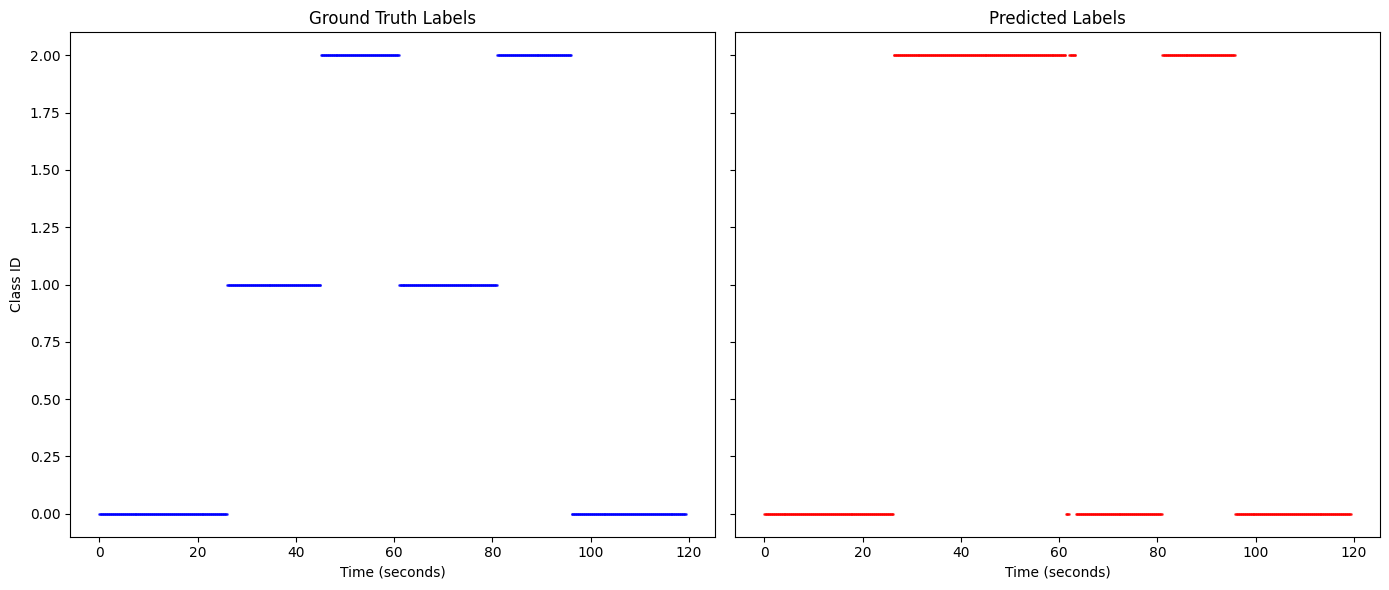

--------------------------------------------------------------------------------
Clustering time series 4 - mfccs features 
Accuracy: 0.9932203389830508
Confusion Matrix:
[[400   0   0]
 [  2 109   0]
 [  3   1 370]]


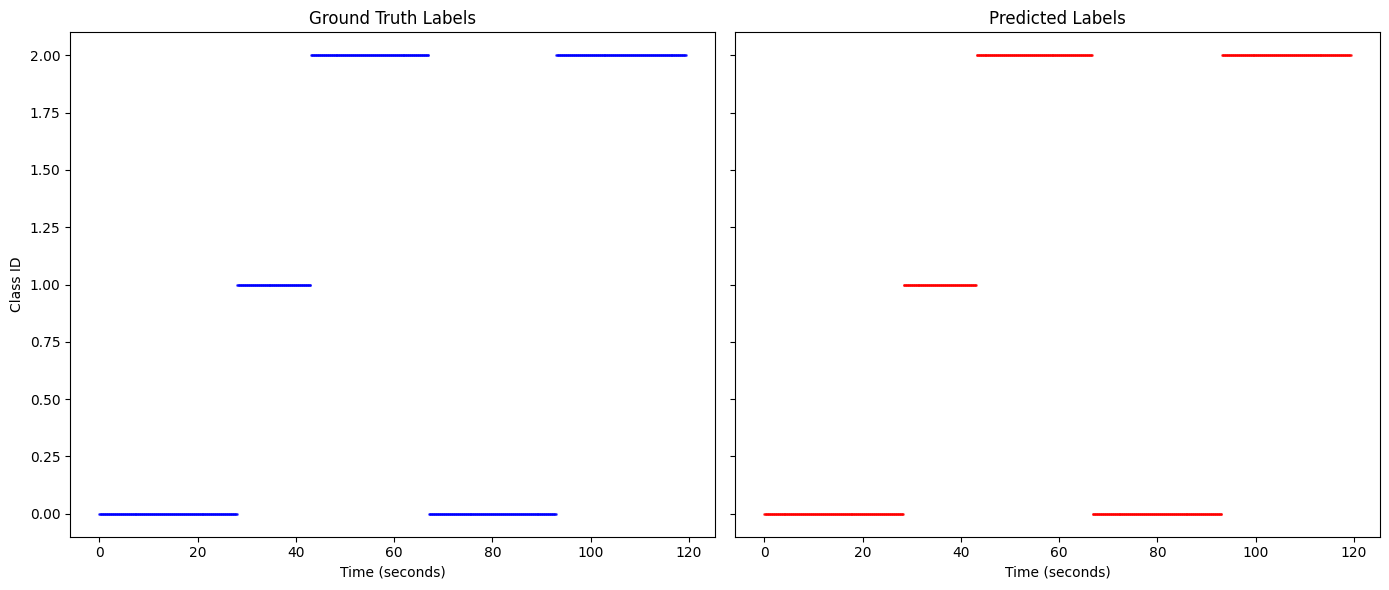

Clustering time series 4 - melspec features 
Accuracy: 0.8372881355932204
Confusion Matrix:
[[252   0   0]
 [ 12 339   0]
 [121   6 150]]


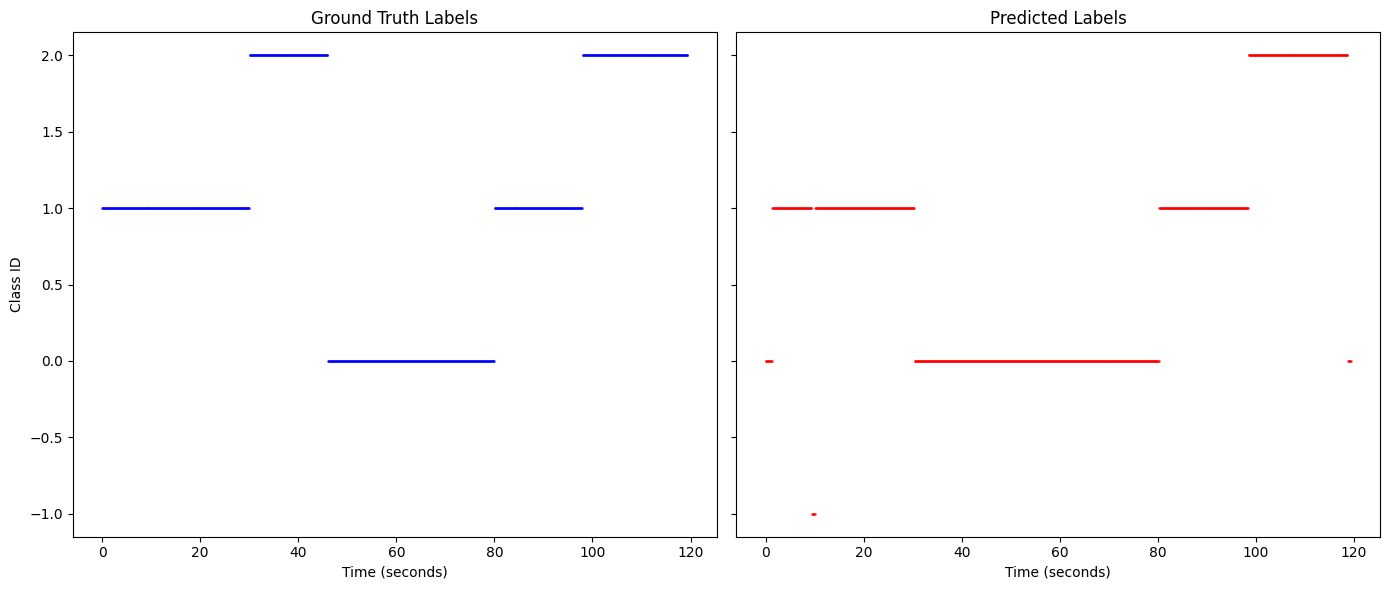

Clustering time series 4 - combined features 
Accuracy: 0.6734463276836158
Confusion Matrix:
[[340   0   1]
 [285   0   3]
 [  0   0 256]]


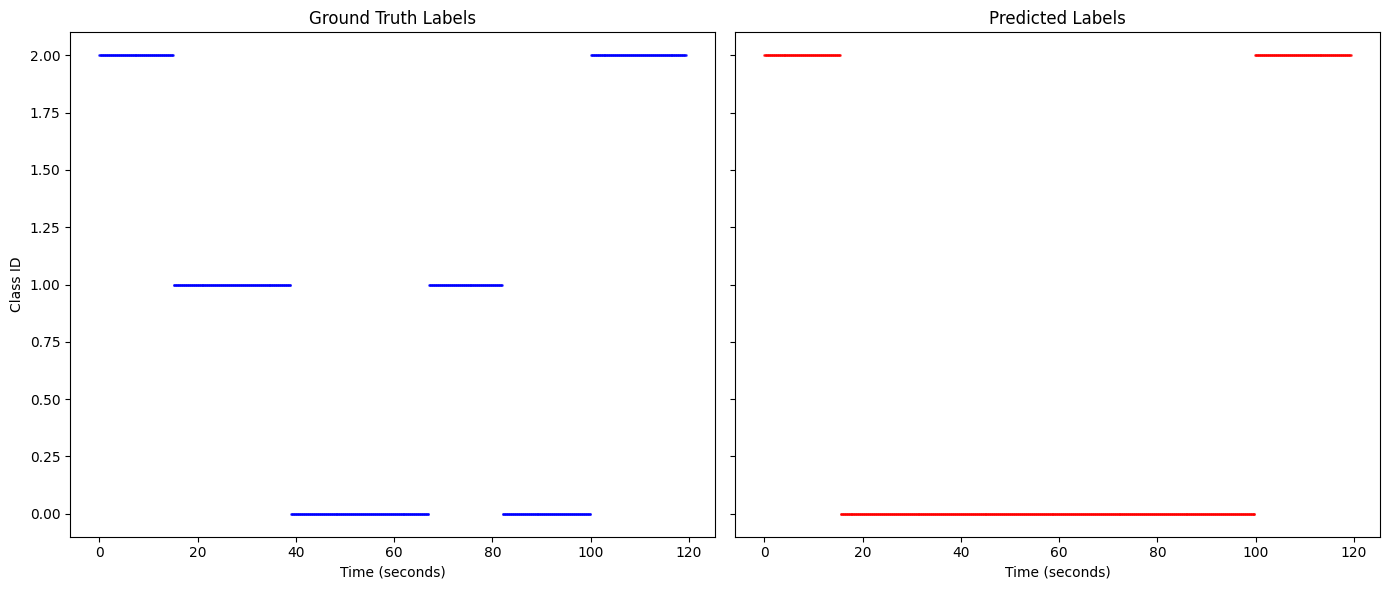

--------------------------------------------------------------------------------


In [10]:
MFCC_PCA_VIGILANCE = 0.15
MELSPEC_PCA_VIGILANCE = 0.05
COMBINED_PCA_VIGILANCE = 0.126

for i in range(5):
    cluster_dataset(i, 'mfccs', mfccs_pca.projected_data.shape[1], 'PCA MFCCs Only Ground Truth vs Predicted Labels', MFCC_PCA_VIGILANCE, True)
    cluster_dataset(i, 'melspec', mfsc_pca.projected_data.shape[1], 'PCA MFSCs Only Ground Truth vs Predicted Labels', MELSPEC_PCA_VIGILANCE, True)
    cluster_dataset(i, 'combined', combined_pca.projected_data.shape[1], 'PCA Combined Ground Truth vs Predicted Labels', COMBINED_PCA_VIGILANCE, True)
    print('-'*80)